# Jensen Shannon Divergence

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import pylab as py
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# One of the most important application of Jensen Shannon Divergence is to measure the data drift.

### Kullback-Leibler Divergence

$KLD$ is a method of measuring statistical distance. Sometimes referred to as “relative entropy.” If you remind this is the same function we use to **mutual information**.



$ KL(P | Q) = \sum_{x \in X} p(x) \cdot ln \left( \cfrac{p(x)}{q(x)} \right) $



### Jensen-Shannon Divergence

$ JS(P|Q) = \frac{1}{2} \cdot KL(P|Q) + \frac{1}{2} \cdot KL(Q|P) $

**Comments:** If $JS(P|Q) = 0$ then is the same distribution, meanwhile greater is the $JS(P|Q)$ more differents are the distributions.

In [4]:
start = time.time()

# 1. Simple example (Discrete)

In [5]:
events = ['red', 'green', 'blue']
p = np.array([0.10, 0.40, 0.50])
q = np.array([0.80, 0.15, 0.05])

In [6]:
KL_PQ = (p*np.log(p/q)).sum()
KL_QP = (q*np.log(q/p)).sum()

In [7]:
JSD = (KL_PQ + KL_QP)/2

In [8]:
JSD

1.3684898421380687

# 2. Complex example (Continuos)

In [9]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
       'Estadistica-machine-learning-python/master/data/Snmesp.csv')

In [10]:
df = pd.read_csv(url)

### i. Histogram of salary

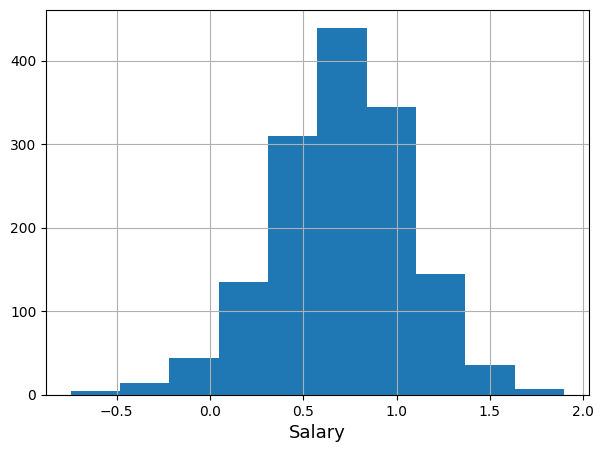

In [11]:
plt.figure(figsize = (7, 5))
df['salary'].hist()
plt.xlabel('Salary', fontsize = 13)
plt.show()

### ii. Comparison of histograms for the two years

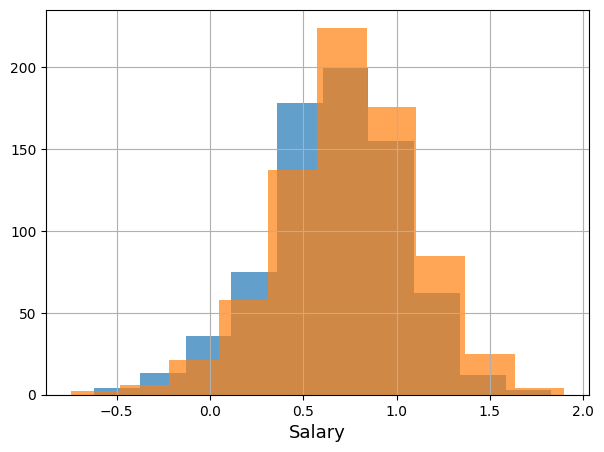

In [12]:
plt.figure(figsize = (7, 5))
df[df['year'] == 1989]['salary'].hist(alpha = 0.7)
df[df['year'] == 1990]['salary'].hist(alpha = 0.7)
plt.xlabel('Salary', fontsize = 13)
plt.show()

In [13]:
df_salary_1989 = df[df['year'] == 1989]['salary']
df_salary_1990 = df[df['year'] == 1990]['salary']

In [14]:
mu_1989 = df_salary_1989.mean()
mu_1990 = df_salary_1990.mean()

In [15]:
std_1989 = df_salary_1989.std()
std_1990 = df_salary_1990.std()

In [16]:
df_salary_1989_std = (df_salary_1989 - mu_1989)/std_1989
df_salary_1990_std = (df_salary_1990 - mu_1990)/std_1990

### iii. Test the pdf

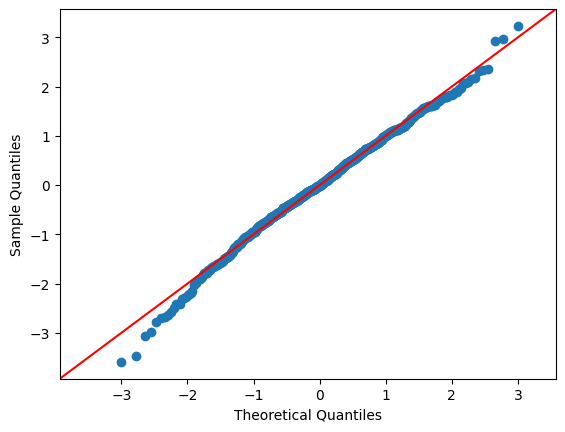

In [17]:
sm.qqplot(df_salary_1989_std, line = '45') 
py.show()

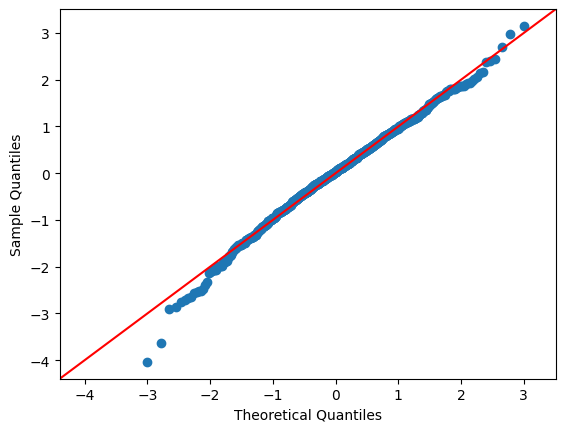

In [18]:
sm.qqplot(df_salary_1990_std, line = '45') 
py.show()

### iv. Density

In [19]:
from scipy.stats import norm

In [20]:
df_salary = df['salary']

In [21]:
p_1989 = df_salary.map(lambda x: norm.pdf(x, mu_1989, std_1989))
p_1990 = df_salary.map(lambda x: norm.pdf(x, mu_1990, std_1990))

In [22]:
df_KL = pd.DataFrame()
df_KL['p_1989'] = p_1989
df_KL['p_1990'] = p_1990

In [23]:
df_KL['KL_1989'] = df_KL.apply(lambda x: x['p_1989']*math.log(x['p_1989']/x['p_1990']), axis = 1)
df_KL['KL_1990'] = df_KL.apply(lambda x: x['p_1990']*math.log(x['p_1990']/x['p_1989']), axis = 1)

In [24]:
KL_1989 = df_KL['KL_1989'].sum()
KL_1990 = df_KL['KL_1990'].sum()

In [25]:
JSD = (KL_1989 + KL_1990)/2

In [26]:
JSD

10.330579108059196

### Time of execution

In [27]:
end = time.time()

In [28]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
